## Задача 1

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import randomized_svd

In [45]:
#Creating 2000*2000 matrix
n = 2000
A = np.random.normal(loc = 0, scale = 1, size = (n,n))

In [52]:
#Numpy
%%time
SVD_np = svd(A)
singular = np.copy(SVD_np[1])
singular[2:] = 0
singular = np.diag(singular)

A_svd = SVD_np[0]@singular@SVD_np[2]

CPU times: user 12.5 s, sys: 995 ms, total: 13.5 s
Wall time: 7.01 s


In [47]:
%%time
#Scipy
SVD_sp = svds(A, k = 2,which = 'LM', solver = 'lobpcg')
A_svds = SVD_sp[0]@np.diag(SVD_sp[1])@SVD_sp[2]


CPU times: user 864 ms, sys: 71.6 ms, total: 936 ms
Wall time: 492 ms


In [48]:
%%time
#Sklearn
SVD_sk = randomized_svd(A, n_components = 2, random_state = 2)

A_rsvd = SVD_sk[0]@np.diag(SVD_sk[1])@SVD_sk[2]

CPU times: user 441 ms, sys: 20.8 ms, total: 462 ms
Wall time: 240 ms


In [53]:
svd_error = np.linalg.norm(A - A_svd, ord = 'fro')
svds_error = np.linalg.norm(A - A_svds, ord = 'fro')
rsvd_error = np.linalg.norm(A - A_rsvd, ord = 'fro')

print(f"Numpy svd error : {svd_error}")
print(f"Scipy svd error : {svds_error}")
print(f"Sklearn svd error : {rsvd_error}")

Numpy svd error : 1995.693426495572
Scipy svd error : 1995.7014039886399
Sklearn svd error : 1995.8577806725846


In [54]:
# low-rank approximation property
np.sqrt(np.sum(SVD_np[1][2:]**2))

1995.6934264955748

## Задача 4

In [10]:
A = np.load('A.npy')
print(A.shape)
n = min(A.shape)

SVD = svd(A)

(50, 50)


The following approximation delivers the best result of specified form(in $L2$ or Frobenius norm sense):
$$A \approx \sigma_1 u_1 v_1^T$$

$u1 - \text{first left singular vector}, \quad v1 - \text{first right singular vector}, \quad
\sigma_1 - \text{first singular value}$

In [11]:
%%time
#Creating diagonal matrix with only one non-zero element(first singular value)
Sigma_matrix = np.diag(np.concatenate((np.array([SVD[1][0]]), np.zeros(49))))

#nullify all elements of U except first left singular vector(first column)
U_multiplier = np.zeros(n*n).reshape(n, n)
U_multiplier[:, 0] = np.ones(n)
U = SVD[0]*U_multiplier

#nullify all elements of V except first left singular vector(first row)
V_multiplier = np.zeros(n*n).reshape(n, n)
V_multiplier[0, :] = np.ones(n)
V = SVD[2]*V_multiplier

A_approx = U@Sigma_matrix@V

CPU times: user 0 ns, sys: 839 µs, total: 839 µs
Wall time: 427 µs


In [12]:
%%time
#another way
u = SVD[0][:, 0] #first left vector
v = SVD[2][0,:]  #first right vector 
s = SVD[1][0]    #first singular value

A_approx_alt = s*u.reshape(n, 1)@v.reshape(1, n)

CPU times: user 111 µs, sys: 13 µs, total: 124 µs
Wall time: 130 µs


In [13]:
#approximations are equal
np.array_equal(A_approx, A_approx_alt)

True

In [14]:
#Measuring error
rel_error = np.linalg.norm((A-A_approx), ord = 'fro')/ np.linalg.norm(A, ord = 'fro')
rel_error

0.7742251888975445

$$\delta_{err} = \frac{\|A-A_{approx}\|_F}{\|A\|_F} \approx 0.77$$

The exact representation of form $$A_{ij} = \sum_{\alpha = 1 }^K h_{\alpha i}\eta_{\alpha j} $$ would have K=50 terms(equals to number of singular values).

In [15]:
#property of low-rank approximation
np.linalg.norm((A-A_approx), ord = 'fro') - np.sqrt(np.sum((SVD[1]**2)[1:])) < 1.0E-10

True

Задача 5

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
A = digits.data
y = digits.target
n = min(A.shape) #number of features
m = max(A.shape) #number of samples

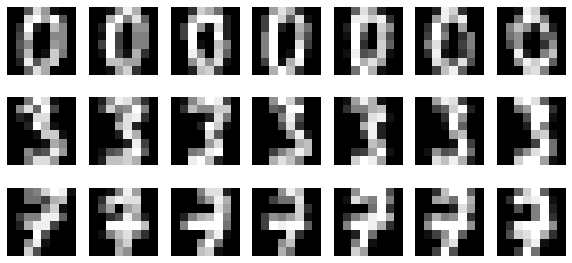

In [17]:
Images = list()
for i in range(max(A.shape)):
  Images.append(A[i,:].reshape(8, 8))
Images = np.array(Images)

fig, ax = plt.subplots(nrows = 3, ncols = 7, figsize = (10, 5), gridspec_kw = {'hspace' : 0})
for i in range(7):
  ax[0, i].imshow(Images[np.where(y == 0)[0][i]], cmap = 'gray')
  ax[1, i].imshow(Images[np.where(y == 3)[0][i]], cmap = 'gray')
  ax[2, i].imshow(Images[np.where(y == 7)[0][i]], cmap = 'gray')
  ax[0,i].set_axis_off()
  ax[1,i].set_axis_off()
  ax[2,i].set_axis_off()


In [18]:
A = A - np.mean(A, axis = 0)

In [19]:
SVD = svd(A)
s1 = SVD[1][0]
s2 = SVD[1][1]
u1 = SVD[0][:, 0]
u2 = SVD[0][:, 1]
v1 = SVD[2][0, :]
v2 = SVD[2][1, :]

In [20]:
first = A@v1
second = A@v2

Text(0, 0.5, 'second principal component')

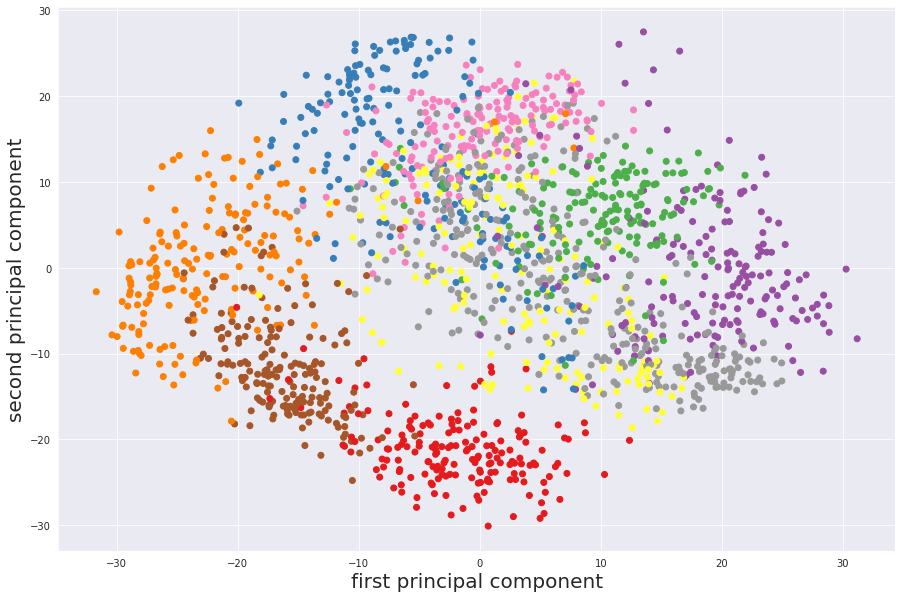

In [21]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (15, 10))
plt.scatter(first, second, c = y, cmap = 'Set1')
plt.xlabel('first principal component', fontsize = 20)
plt.ylabel('second principal component', fontsize = 20)

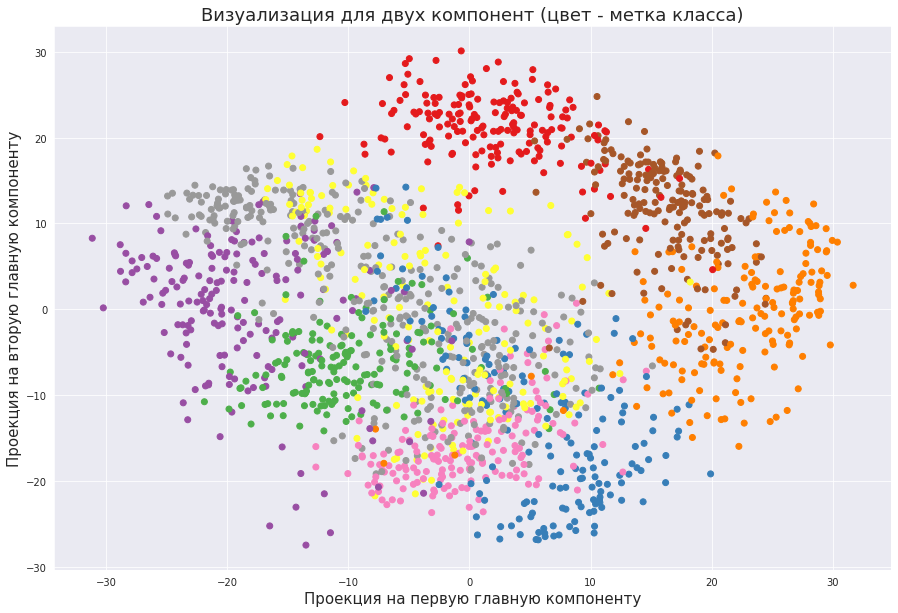

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(A)

X_proj = pca.transform(A)[:, :2]
plt.figure(figsize = (15, 10))
plt.xlabel('Проекция на первую главную компоненту', fontsize=15)
plt.ylabel('Проекция на вторую главную компоненту', fontsize=15)
plt.title('Визуализация для двух компонент (цвет - метка класса)', fontsize=18)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y, cmap='Set1')
plt.show()

In [23]:
# the reason the plots are not the same
print(v1.T@pca.components_[0])
print(v2.T@pca.components_[1])

-0.9999999999999891
-0.9999999999999785


## Вывод
###### Понижение размерности оставляет достатоное количесвто информации о изображениях, чтобы можно было их разделить на классы.